In [37]:
import pandas as pd
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [38]:
selected_columns = [
    "Family History",
    "Age",
    "BMI",
    "Physical Activity",
    "Dietary Habits",
    "Socioeconomic Factors",
    "Smoking Status",
    "Alcohol Consumption",
    "Steroid Use History",
    "Liver Function Tests"
]
target_column = "Target"

df = pd.read_csv("diabetes_dataset00.csv")
df = df[selected_columns + [target_column]].dropna()

label_encoders = {}
for column in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df[selected_columns]
y = df[target_column]

[[-1.00893275e+00  9.50549967e-01  1.03200609e+00 ...  1.22575307e-03
  -9.96577286e-01 -9.99285969e-01]
 [ 9.91146335e-01  1.71036919e+00  1.52935414e+00 ...  1.22697883e+00
  -9.96577286e-01 -9.99285969e-01]
 [ 9.91146335e-01  9.03061265e-01  1.52935414e+00 ...  1.22697883e+00
  -9.96577286e-01  1.00071454e+00]
 ...
 [-1.00893275e+00 -1.47137382e+00 -9.57386121e-01 ...  1.22575307e-03
  -9.96577286e-01 -9.99285969e-01]
 [-1.00893275e+00  1.23548218e+00  1.69513683e+00 ...  1.22575307e-03
  -9.96577286e-01 -9.99285969e-01]
 [ 9.91146335e-01 -7.59043297e-01 -1.62051686e+00 ...  1.22575307e-03
  -9.96577286e-01  1.00071454e+00]]


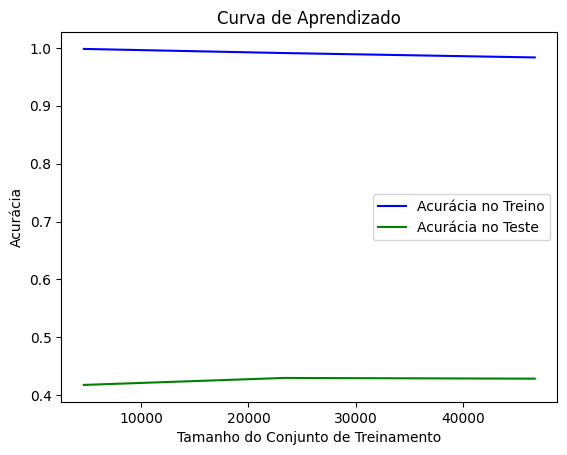

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train)

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
dump(model, "random_forest_model.joblib")
for column, le in label_encoders.items():
    dump(le, f"{column}_label_encoder.joblib")

dump(scaler, "scaler.joblib")

train_sizes, train_scores, test_scores = learning_curve(
    model,
    X, y,
    cv=3,
    scoring="accuracy",
    train_sizes=[0.1, 0.5, 1.0]
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Acurácia no Treino", color="blue")
plt.plot(train_sizes, test_mean, label="Acurácia no Teste", color="green")

plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Acurácia")
plt.title("Curva de Aprendizado")
plt.legend()
plt.show()

In [ ]:
model = load("random_forest_model.joblib")

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

Acurácia no conjunto de teste: 0.43


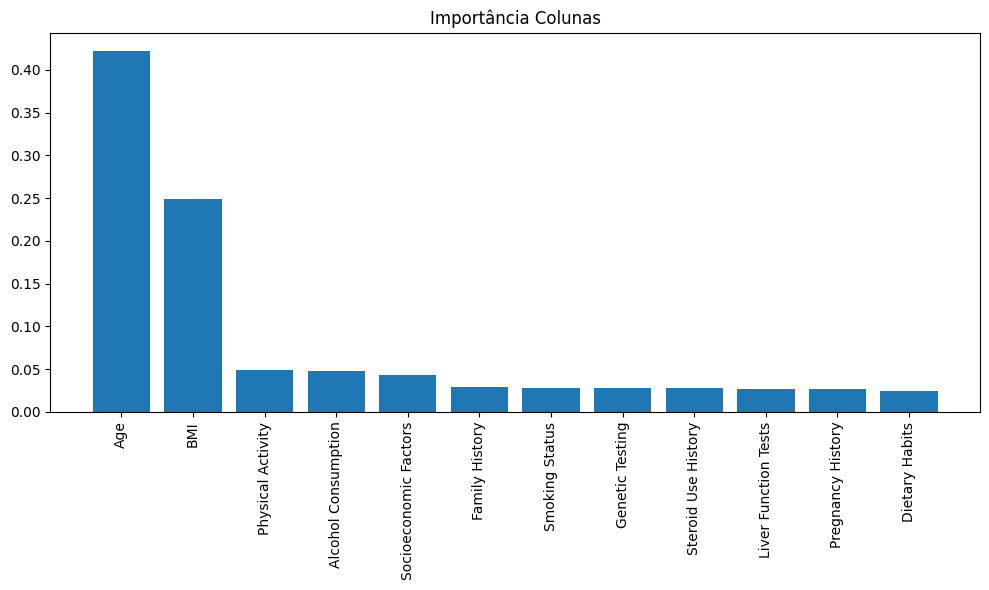

In [26]:
# Carregar o modelo salvo
model = load("random_forest_model.joblib")
import numpy as np

# Obter a importância das features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importância Colunas")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [selected_columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


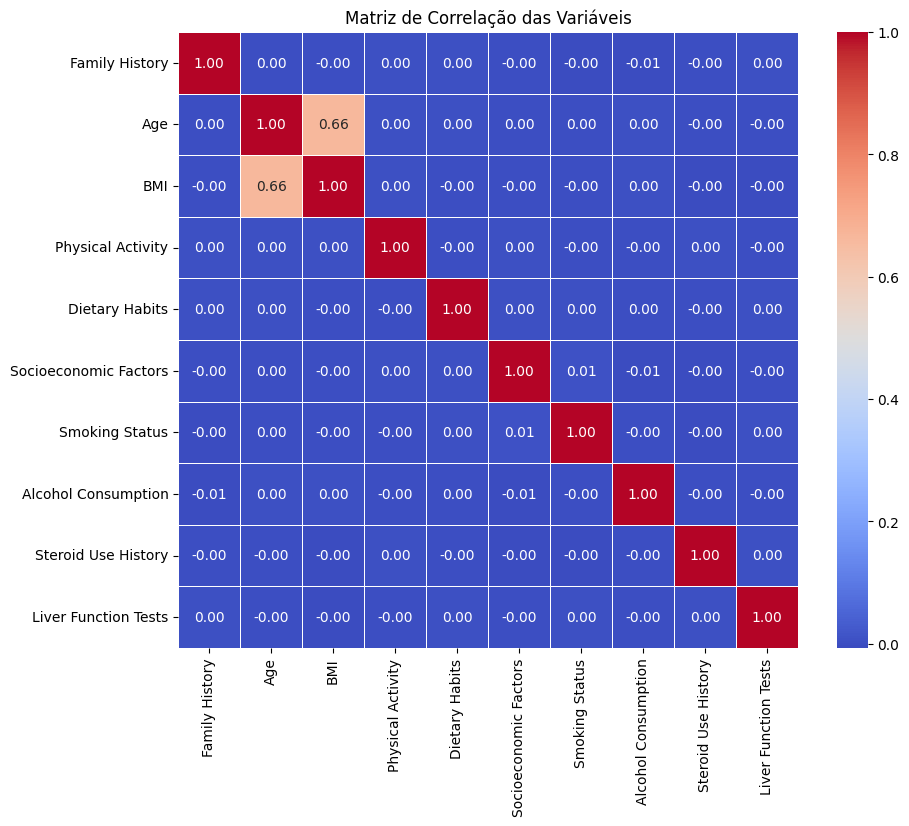

In [34]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlação das Variáveis")
plt.show()

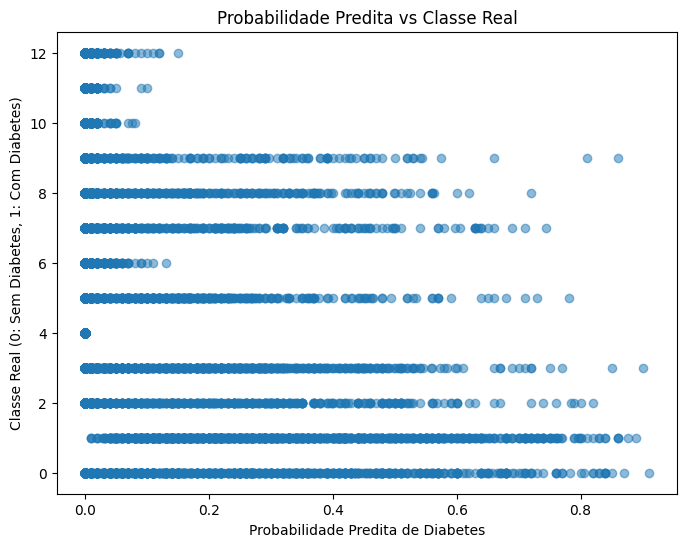

In [36]:
y_probs = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(y_probs, y_test, alpha=0.5)
plt.xlabel("Probabilidade Predita de Diabetes")
plt.ylabel("Classe Real (0: Sem Diabetes, 1: Com Diabetes)")
plt.title("Probabilidade Predita vs Classe Real")
plt.show()